<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
  import tensorflow_datasets as tfds
  (ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.50F8O7_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


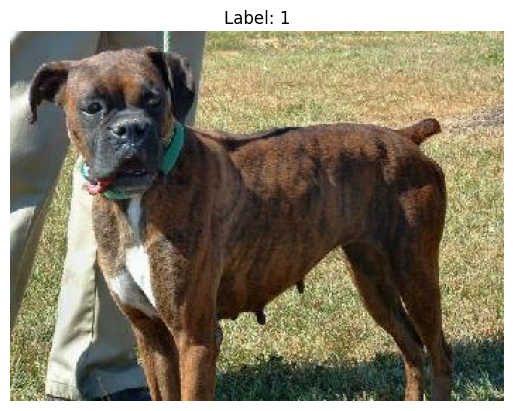

In [ ]:
import matplotlib.pyplot as plt
for image, label in ds_train.take(1):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label.numpy()}")
    plt.show()

In [ ]:

# Define image size and batch size
IMG_SIZE = 180
BATCH_SIZE = 32
NUM_CLASSES = ds_info.features['label'].num_classes

In [ ]:

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=NUM_CLASSES)
    return image, label

In [ ]:
import tensorflow as tf
# Apply preprocessing
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:

# Shuffle, batch, cache, and prefetch
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    Dropout(0.5),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),  # Replaces Flatten
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,018 (429.76 KB)

 Trainable params: 110,018 (429.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=20
)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 91ms/step - accuracy: 0.5316 - loss: 0.6893 - val_accuracy: 0.5905 - val_loss: 0.6799
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.5877 - loss: 0.6691 - val_accuracy: 0.6167 - val_loss: 0.6532
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6151 - loss: 0.6505 - val_accuracy: 0.6479 - val_loss: 0.6316
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6463 - loss: 0.6275 - val_accuracy: 0.6816 - val_loss: 0.5888
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6796 - loss: 0.6006 - val_accuracy: 0.7087 - val_loss: 0.5631
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6997 - loss: 0.5778 - val_accuracy: 0.7038 - val_loss: 0.5648
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7116 - loss: 0.5630 - val_accuracy: 0.7186 - val_loss: 0.5458
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7282 - loss: 0.5440 - 

In [ ]:

loss,accuracy = model.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8081 - loss: 0.4157
Test Loss: 0.4011
Test Accuracy: 81.34%


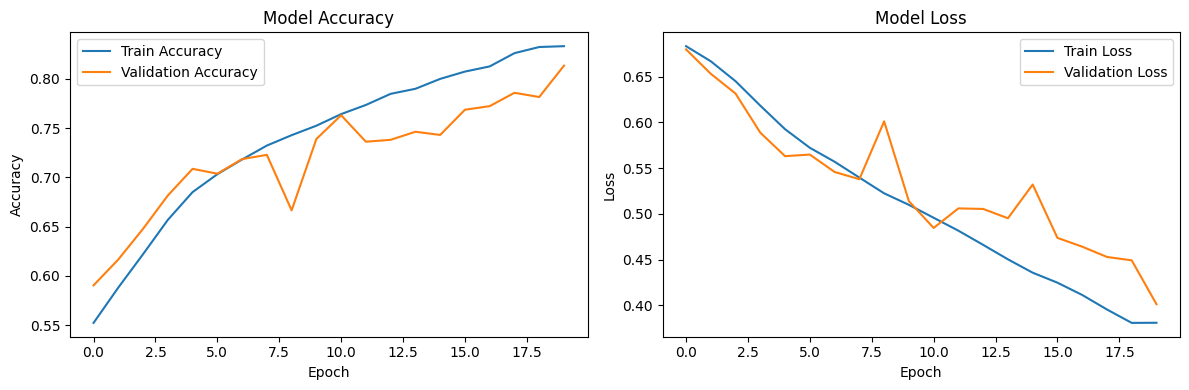

In [ ]:

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

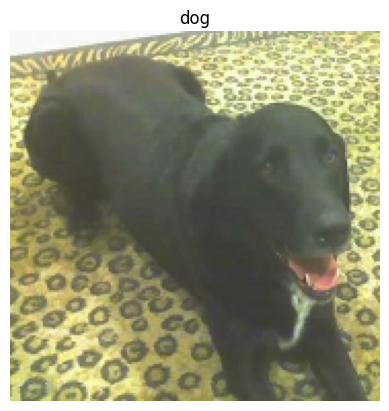

In [ ]:
# Get the label names
get_label_name = ds_info.features['label'].int2str

# Fetch one batch
for image_batch, label_batch in ds_train.take(1):
    # Select the first image and label from the batch
    image = image_batch[0].numpy()
    label = tf.argmax(label_batch[0]).numpy() # Use tf.argmax and convert to numpy for display
    plt.imshow(image)
    plt.axis('off')
    plt.title(get_label_name(label))
    plt.show()